# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** A. Edwin Krisandika Putra  
**NIM:** 122140003  

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


True
(2304, 1728, 3)


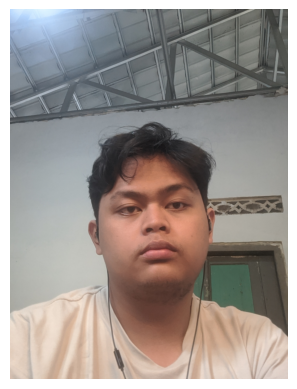

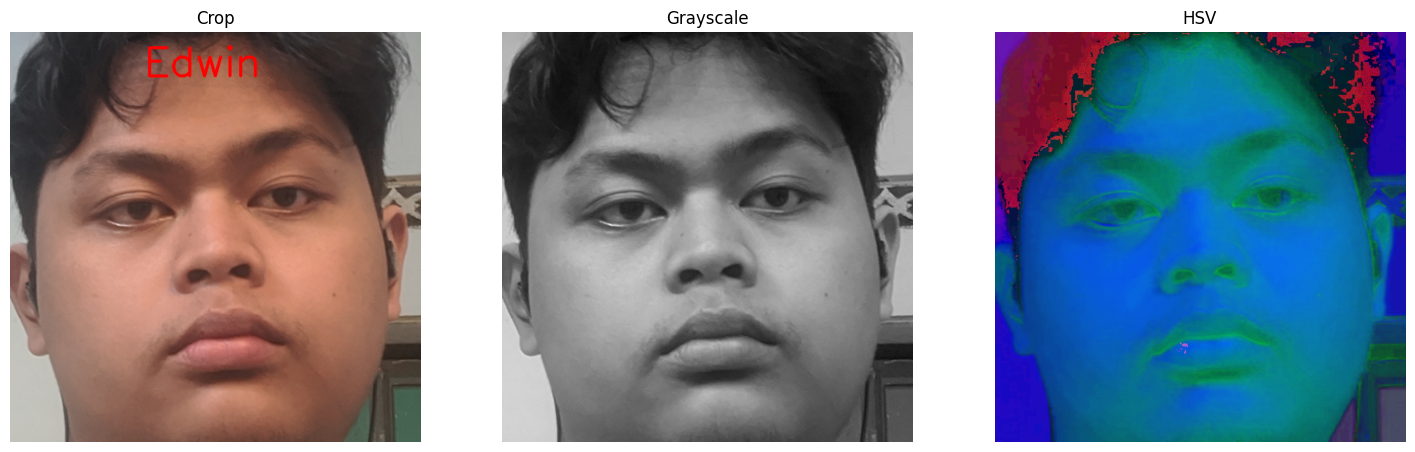

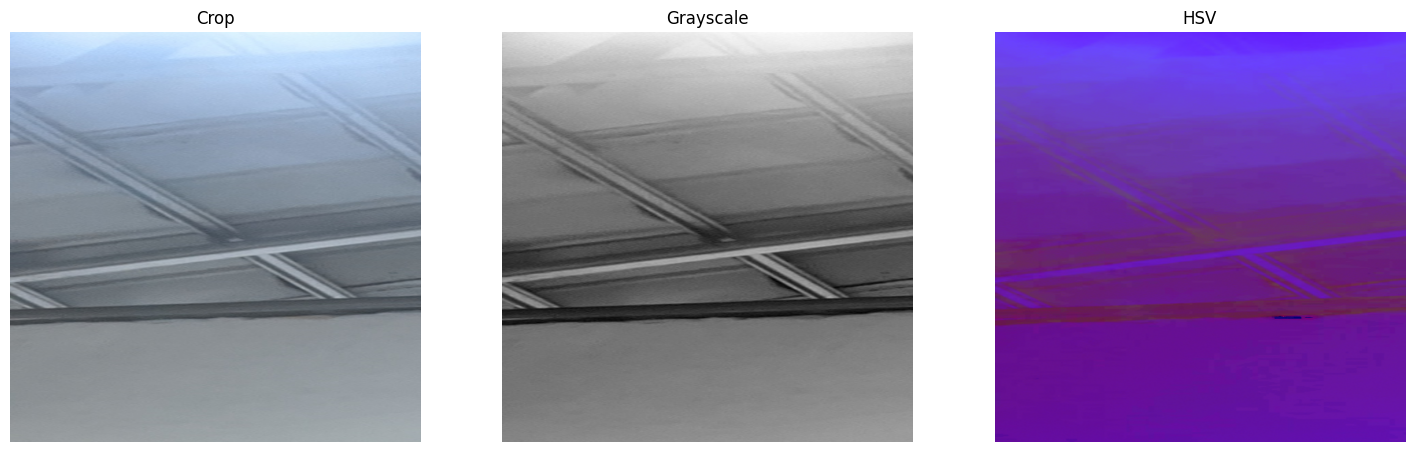

In [68]:
import os
import cv2
import matplotlib.pyplot as plt

selfie_path = os.path.join("assets_ws4", "selfie.jpg")
print(os.path.exists(selfie_path))

image = cv2.imread(selfie_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
plt.axis("off")
plt.show()

output_dir = "results_ws4"
os.makedirs(output_dir, exist_ok=True)

#Crop bagian wajah dan background
crop_wajah = image[900:1700, 500:1300]
crop_bg = image[0:1000, 0:300]

#Resize gambar menjadi 920x920
wajah_resized = cv2.resize(crop_wajah, (920, 920))
cv2.imwrite(os.path.join(output_dir, "wajah_resized.jpg"), cv2.cvtColor(wajah_resized, cv2.COLOR_RGB2BGR))
bg_resized = cv2.resize(crop_bg, (920, 920))
cv2.imwrite(os.path.join(output_dir, "bg_resized.jpg"), cv2.cvtColor(bg_resized, cv2.COLOR_RGB2BGR))

#Konversi gambar menjadi grayscale dan HSV
wajah_gray = cv2.cvtColor(wajah_resized, cv2.COLOR_RGB2GRAY)
cv2.imwrite(os.path.join(output_dir, "wajah_gray.jpg"), wajah_gray)
wajah_hsv = cv2.cvtColor(wajah_resized, cv2.COLOR_RGB2HSV)
cv2.imwrite(os.path.join(output_dir, "wajah_hsv.jpg"), cv2.cvtColor(wajah_hsv, cv2.COLOR_RGB2BGR))
bg_gray = cv2.cvtColor(bg_resized, cv2.COLOR_RGB2GRAY)
cv2.imwrite(os.path.join(output_dir, "bg_gray.jpg"), bg_gray)
bg_hsv = cv2.cvtColor(bg_resized, cv2.COLOR_RGB2HSV)
cv2.imwrite(os.path.join(output_dir, "bg_hsv.jpg"), cv2.cvtColor(bg_hsv, cv2.COLOR_RGB2BGR))

#Tampilkan hasil resize, grayscale, dan HSV
#Wajah
anotasi = wajah_resized.copy()
cv2.putText(anotasi, "Edwin",(300, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 5)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(anotasi)
plt.title("Crop")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wajah_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wajah_hsv)
plt.title("HSV")
plt.axis("off")

#background
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(bg_resized)
plt.title("Crop")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(bg_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(bg_hsv)
plt.title("HSV")
plt.axis("off")

plt.show()

### Penjelasan Proses
Crop dilakukan dua kali, crop pertama yaitu crop area wajah dengan bentuk kotak persegi dan crop kedua yaitu crop area latar belakang dengan bentuk persegi panjang. Cropping dilakukan secara manual dengan menuliskan pixel yang kira kira pas untuk setiap gambar hasilnya. Setelah gambar dicrop dan menghasilkan 2 gambar baru, kemudian gambar diresize menjadi 920x920 pixel (jadi persegi dua duanya). Lalu, kedua gambar barusan (yang sudah jadi 920) dikonversi warnanya, hasil konversian disimpan di folder results. Pada konversi grayscale, gambar berubah menjadi hitam putih dan pada konversi HSV, informasi gambar diubah yang awalnya dari intensitas warna merah, hijau, biru (RGB) menjadi 3 komponen, Hue yaitu jenis warna, Saturation yaitu seberapa kuat warnanya, dan Value yaitu intensitas cahaya. Setelah itu, gambar hasil crop (yang masih RGB) diberi nama di atas kepala dengan fungsi cv2 (putText). Lalu gambar ditampilkan ke output.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


5 pixel pertama pada Wajah Asli:
[[158 167 174]
 [157 166 173]
 [156 165 172]
 [156 165 172]
 [157 166 173]]

5 pixel pertama pada Wajah Modifikasi:
[[208 167 144]
 [207 166 143]
 [206 165 142]
 [206 165 142]
 [207 166 143]]

5 pixel pertama pada Background Asli:
[[193 223 255]
 [191 221 255]
 [188 218 252]
 [189 219 253]
 [192 223 254]]

5 pixel pertama pada Background Modifikasi:
[[243 223 225]
 [241 221 225]
 [238 218 222]
 [239 219 223]
 [242 223 224]]


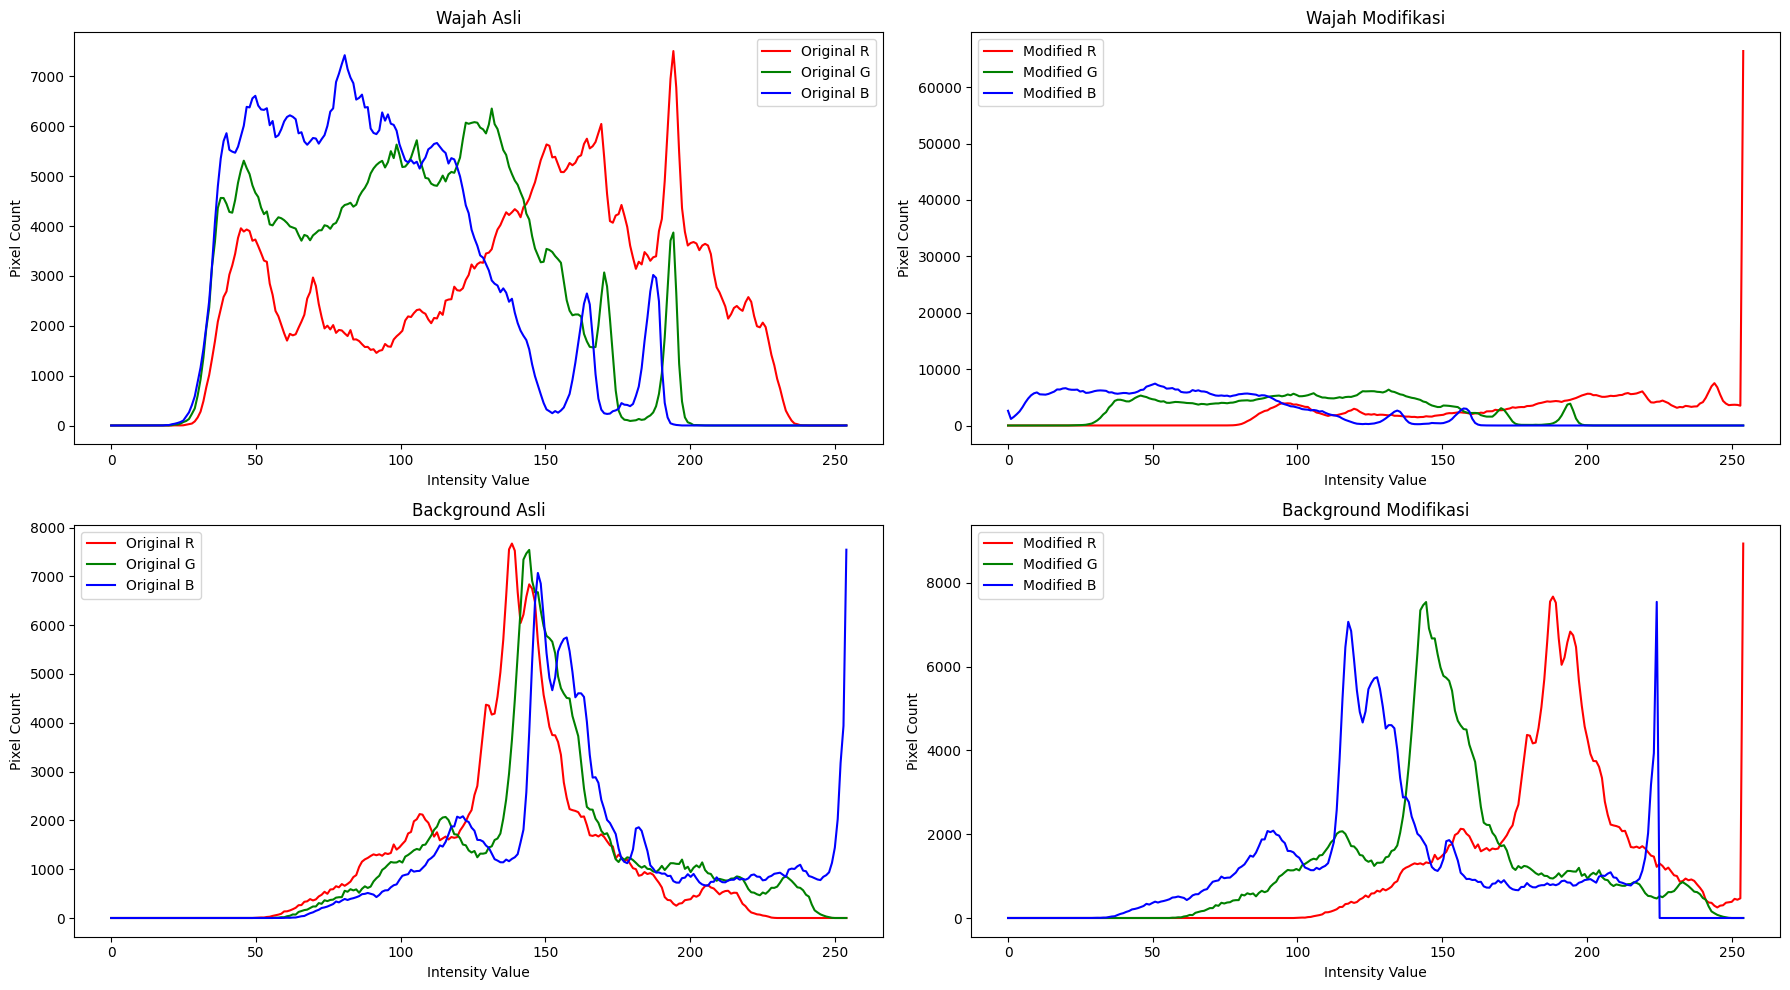

In [69]:
import numpy as np
from PIL import Image

crop_wajah_rgb = crop_wajah[:, :, :3].astype(np.int16)
crop_bg_rgb = crop_bg[:, :, :3].astype(np.int16)

R = np.clip(crop_wajah_rgb[:, :, 0] + 50, 0, 255).astype(np.uint8)
G = crop_wajah_rgb[:, :, 1].astype(np.uint8)
B = np.clip(crop_wajah_rgb[:, :, 2] - 30, 0, 255).astype(np.uint8)
crop_wajah_modified = np.dstack((R, G, B))

R = np.clip(crop_bg_rgb[:, :, 0] + 50, 0, 255).astype(np.uint8)
G = crop_bg_rgb[:, :, 1].astype(np.uint8)
B = np.clip(crop_bg_rgb[:, :, 2] - 30, 0, 255).astype(np.uint8)
crop_bg_modified = np.dstack((R, G, B))

print("5 pixel pertama pada Wajah Asli:")
print(crop_wajah[0, :5, :3])
print("\n5 pixel pertama pada Wajah Modifikasi:")
print(crop_wajah_modified[0, :5, :3])

print("\n5 pixel pertama pada Background Asli:")
print(crop_bg[0, :5, :3])
print("\n5 pixel pertama pada Background Modifikasi:")
print(crop_bg_modified[0, :5, :3])

os.makedirs('results_ws4', exist_ok=True)
Image.fromarray(crop_wajah_modified).save(os.path.join('results_ws4', 'crop_wajah_modified.png'))
Image.fromarray(crop_bg_modified).save(os.path.join('results_ws4', 'crop_bg_modified.png'))

colors = ('r', 'g', 'b')
plt.figure(figsize=(18, 10))

for i, color in enumerate(colors):
    hist, bins = np.histogram(crop_wajah[:, :, i].flatten(), bins=256, range=(0, 255))
    plt.subplot(2, 2, 1)
    plt.plot(bins[:-1], hist, color=color, label=f'Original {color.upper()}')
    plt.title('Wajah Asli')
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.legend()

    hist, bins = np.histogram(crop_wajah_modified[:, :, i].flatten(), bins=256, range=(0, 255))
    plt.subplot(2, 2, 2)
    plt.plot(bins[:-1], hist, color=color, label=f'Modified {color.upper()}')
    plt.title('Wajah Modifikasi')
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.legend()

    hist, bins = np.histogram(crop_bg[:, :, i].flatten(), bins=256, range=(0, 255))
    plt.subplot(2, 2, 3)
    plt.plot(bins[:-1], hist, color=color, label=f'Original {color.upper()}')
    plt.title('Background Asli')
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.legend()

    hist, bins = np.histogram(crop_bg_modified[:, :, i].flatten(), bins=256, range=(0, 255))
    plt.subplot(2, 2, 4)
    plt.plot(bins[:-1], hist, color=color, label=f'Modified {color.upper()}')
    plt.title('Background Modifikasi')
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.legend()

plt.tight_layout()
plt.show()

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


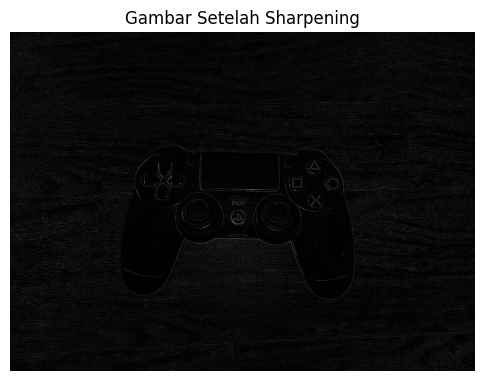

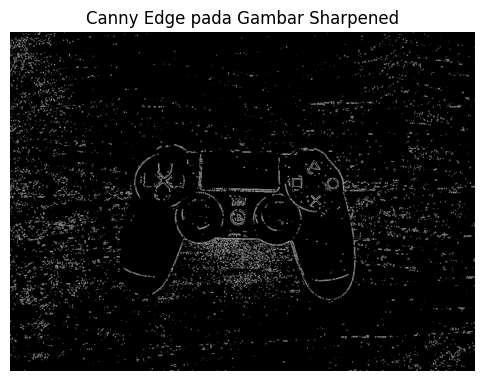

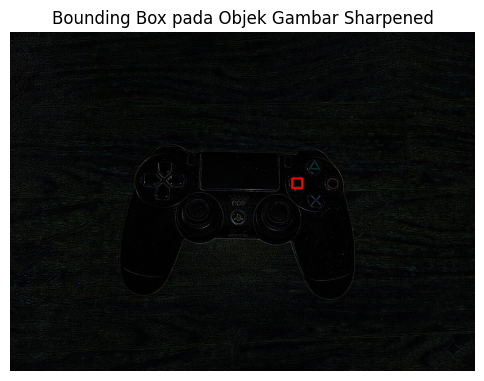

In [84]:
# load gambar controller di folder assets_ws4
ds4_path = os.path.join("assets_ws4", "ds4.jpg")
ds4 = cv2.cvtColor(cv2.imread(ds4_path), cv2.COLOR_BGR2RGB)
ds4_gray = cv2.cvtColor(ds4, cv2.COLOR_RGB2GRAY)

# plt.figure(figsize=(6,6))
# plt.imshow(ds4_gray, cmap='gray')
# plt.title("Dokumen Doksli Asli")
# plt.axis("off")
# plt.show()

# blurred = cv2.GaussianBlur(ds4_gray, (15, 15), 0)
# edges_blur = cv2.Canny(blurred, 70, 100)

# x, y, w, h = 280, 290, 600, 400
# ds4_bbox = ds4.copy()
# cv2.rectangle(ds4_bbox, (x, y), (x + w, y + h), (255, 0, 0), 3)

# plt.figure(figsize=(6,6))
# plt.imshow(edges_blur, cmap='gray')
# plt.title("Canny Edge Setelah Gaussian Blur")
# plt.axis("off")
# plt.show()

# plt.figure(figsize=(6,6))
# plt.imshow(ds4_bbox)
# plt.title("Bounding Box pada Objek")
# plt.axis("off")
# plt.show()

sharpen_kernel = np.array([[0, -1, 0],
                         [-1, 4, -1],
                         [0, -1, 0]])
ds4_sharpened = cv2.filter2D(ds4, -1, sharpen_kernel)
ds4_sharpened_gray = cv2.cvtColor(ds4_sharpened, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(ds4_sharpened_gray, cmap='gray')
plt.title("Gambar Setelah Sharpening")
plt.axis("off")
plt.show()

#Canny edge pada gambar sharpened
edges_sharpened = cv2.Canny(ds4_sharpened_gray, 170, 200)
plt.figure(figsize=(6,6))
plt.imshow(edges_sharpened, cmap='gray')
plt.title("Canny Edge pada Gambar Sharpened")
plt.axis("off")

#bounding box otomatis
contours, _ = cv2.findContours(edges_sharpened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ds4_bbox = ds4_sharpened.copy()
for contour in contours:
    if cv2.contourArea(contour) > 300:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(ds4_bbox, (x, y), (x + w, y + h), (255, 0, 0), 3)
plt.figure(figsize=(6,6))
plt.imshow(ds4_bbox)
plt.title("Bounding Box pada Objek Gambar Sharpened")
plt.axis("off")
plt.show()

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

True
Jumlah landmark wajah yang terdeteksi: 468


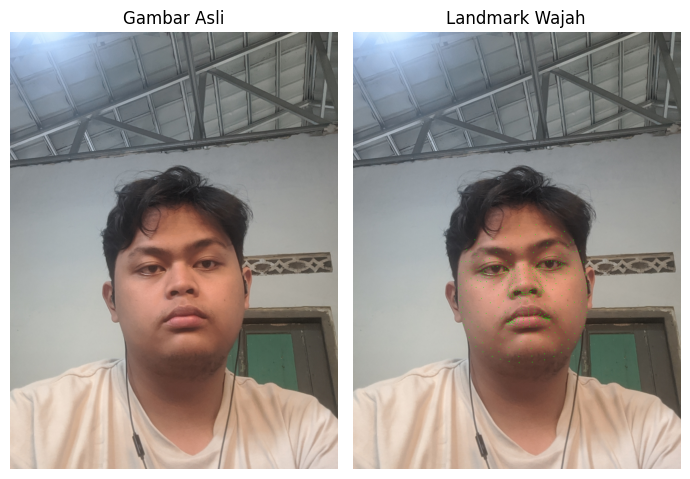

In [71]:
import mediapipe as mp

selfie_path = os.path.join("assets_ws4", "selfie.jpg")
print(os.path.exists(selfie_path))

# baca dan simpan salinan gambar asli
image_bgr = cv2.imread(selfie_path)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
original = image.copy()

# deteksi wajah dan landmark pakai MediaPipe
mp_face_mesh = mp.solutions.face_mesh
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
    results = face_mesh.process(original)

# gambar landmark di salinan gambar
annotated = original.copy()
if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]
    print(f"Jumlah landmark wajah yang terdeteksi: {len(face_landmarks.landmark)}")
    for landmark in face_landmarks.landmark:
        x = int(landmark.x * annotated.shape[1])
        y = int(landmark.y * annotated.shape[0])
        cv2.circle(annotated, (x, y), 2, (0, 255, 0), -1)
else:
    print("Wajah tidak terdeteksi.")



plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(annotated)
plt.title("Landmark Wajah")
plt.axis("off")

plt.tight_layout()
plt.show()

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

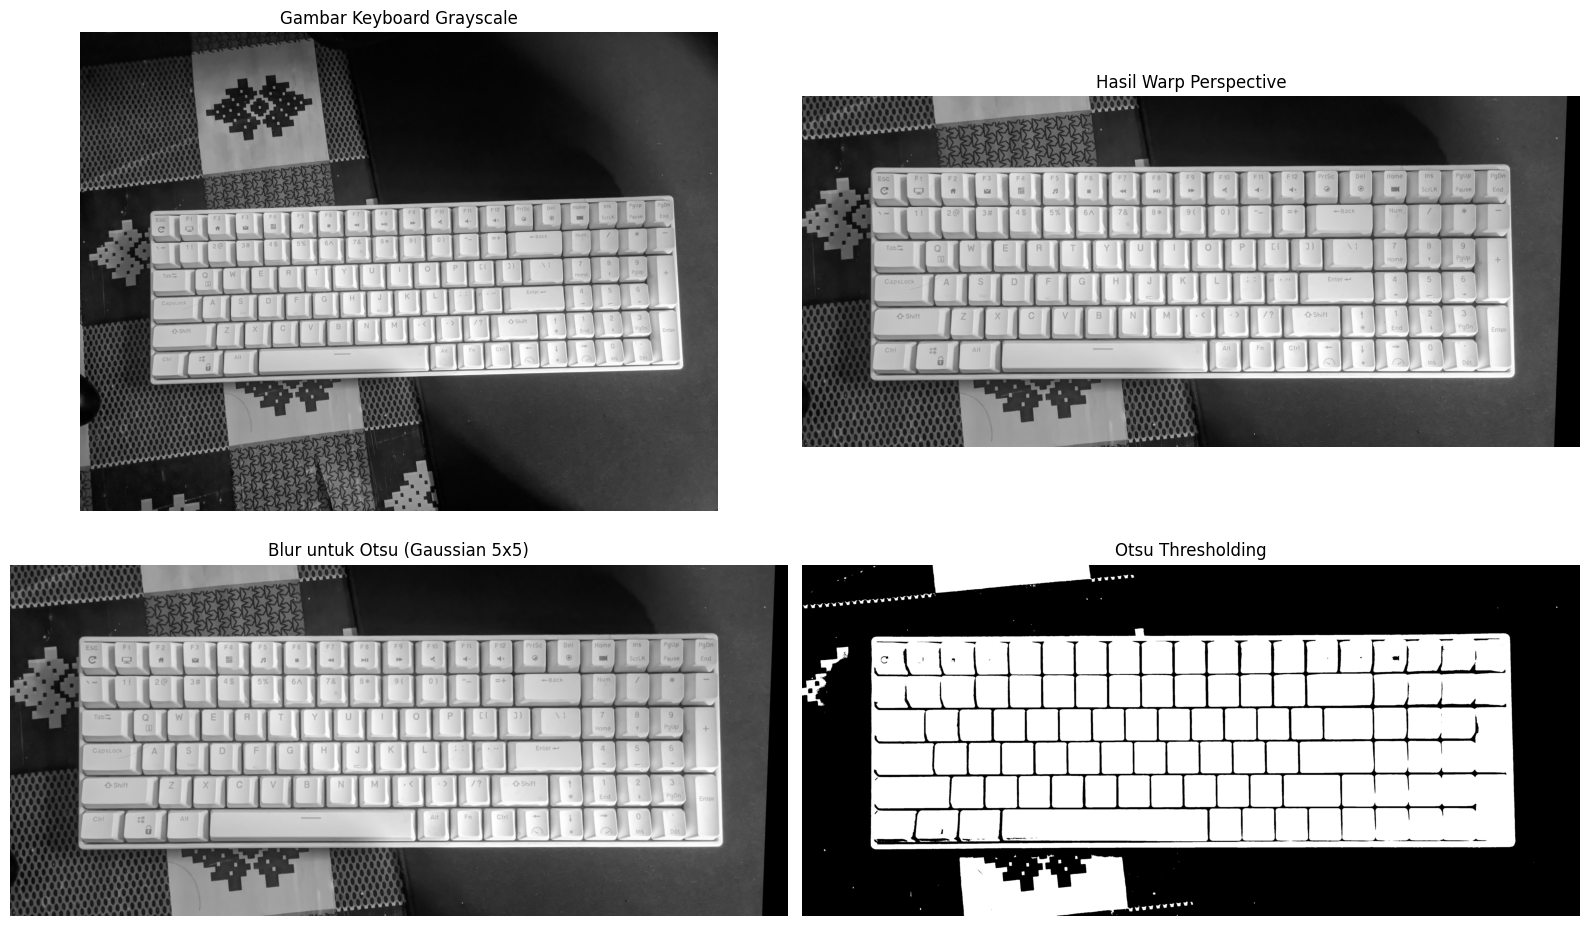

In [142]:
kb_path = cv2.imread(os.path.join("assets_ws4", "keyboard.jpg"))
kb = cv2.cvtColor(kb_path, cv2.COLOR_BGR2RGB)
kb_gray = cv2.cvtColor(kb, cv2.COLOR_RGB2GRAY)

rows, cols = kb_gray.shape

pts1 = np.float32([
    [100, 885],
    [4700, 770],
    [100, 2965],
    [4780, 2850]
])

width = int(np.linalg.norm(pts1[1] - pts1[0]))
height = int(np.linalg.norm(pts1[2] - pts1[0]))

pts2 = np.float32([
    [0, 0],
    [width, 0],
    [0, height],
    [width, height]
])

M = cv2.getPerspectiveTransform(pts1, pts2)
kb_warp = cv2.warpPerspective(kb_gray, M, (width, height))

kb_blur = cv2.GaussianBlur(kb_warp, (5, 5), 0)
_, kb_otsu = cv2.threshold(kb_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.imshow(kb_gray, cmap='gray')
plt.title("Gambar Keyboard Grayscale")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(kb_warp, cmap='gray')
plt.title("Hasil Warp Perspective")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(kb_blur, cmap='gray')
plt.title("Blur untuk Otsu (Gaussian 5x5)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(kb_otsu, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis("off")

plt.tight_layout()
plt.show()


### **Referensi**
* a
* b
* c

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.